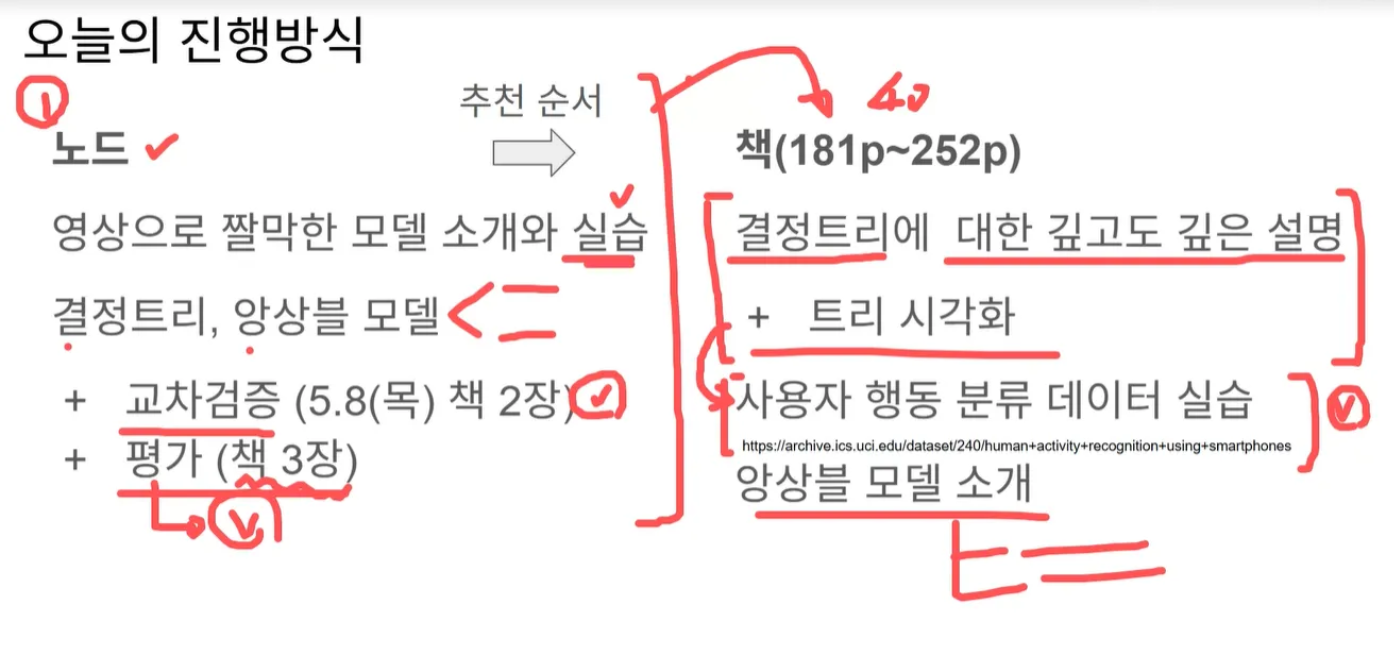

## 의시결정 나무 돌리기

1. 의사 결정 나무를 돌릴 수 있는 dataset을 만들기
2. 학습용 데이터와 훈련용 데이터를 나누기, 데이터 형식 check 하고 필요할 경우 인코딩 진행하기,
2. 트레인 data 및 훈련용 data 레이블 값을 check
- e.g., print(y_train['action'].value_counts())
4. Decision Tree classifier 이용, 파라미터 추출하기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위한 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

5. 결정 트리의 tree depth 가 예측 정확도에 주는 영향 보기

In [ ]:
from sklearn.model_selection improt GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24], 'min_samples_split': [16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

#코드 넣으면 결과 나옴

6. depth에 따른 평가 데이터 세트의 평균 수치 구하기

In [ ]:
#GridSearchCV 객체의 cv_results_ 속성을 dataframe으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
#max_depth 파라미터 값과 그 떄의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]
#과접합을 지양하고 성능이 가장 좋을 경우를 찾기

이런 식으로 max_depth, max_samples_split 를 같이 변경하면서 최적화를 찾고 마지막으로 feacture_importance도 표현해야함 - 그래프를 그리는 것도 방법임.

(209pg)



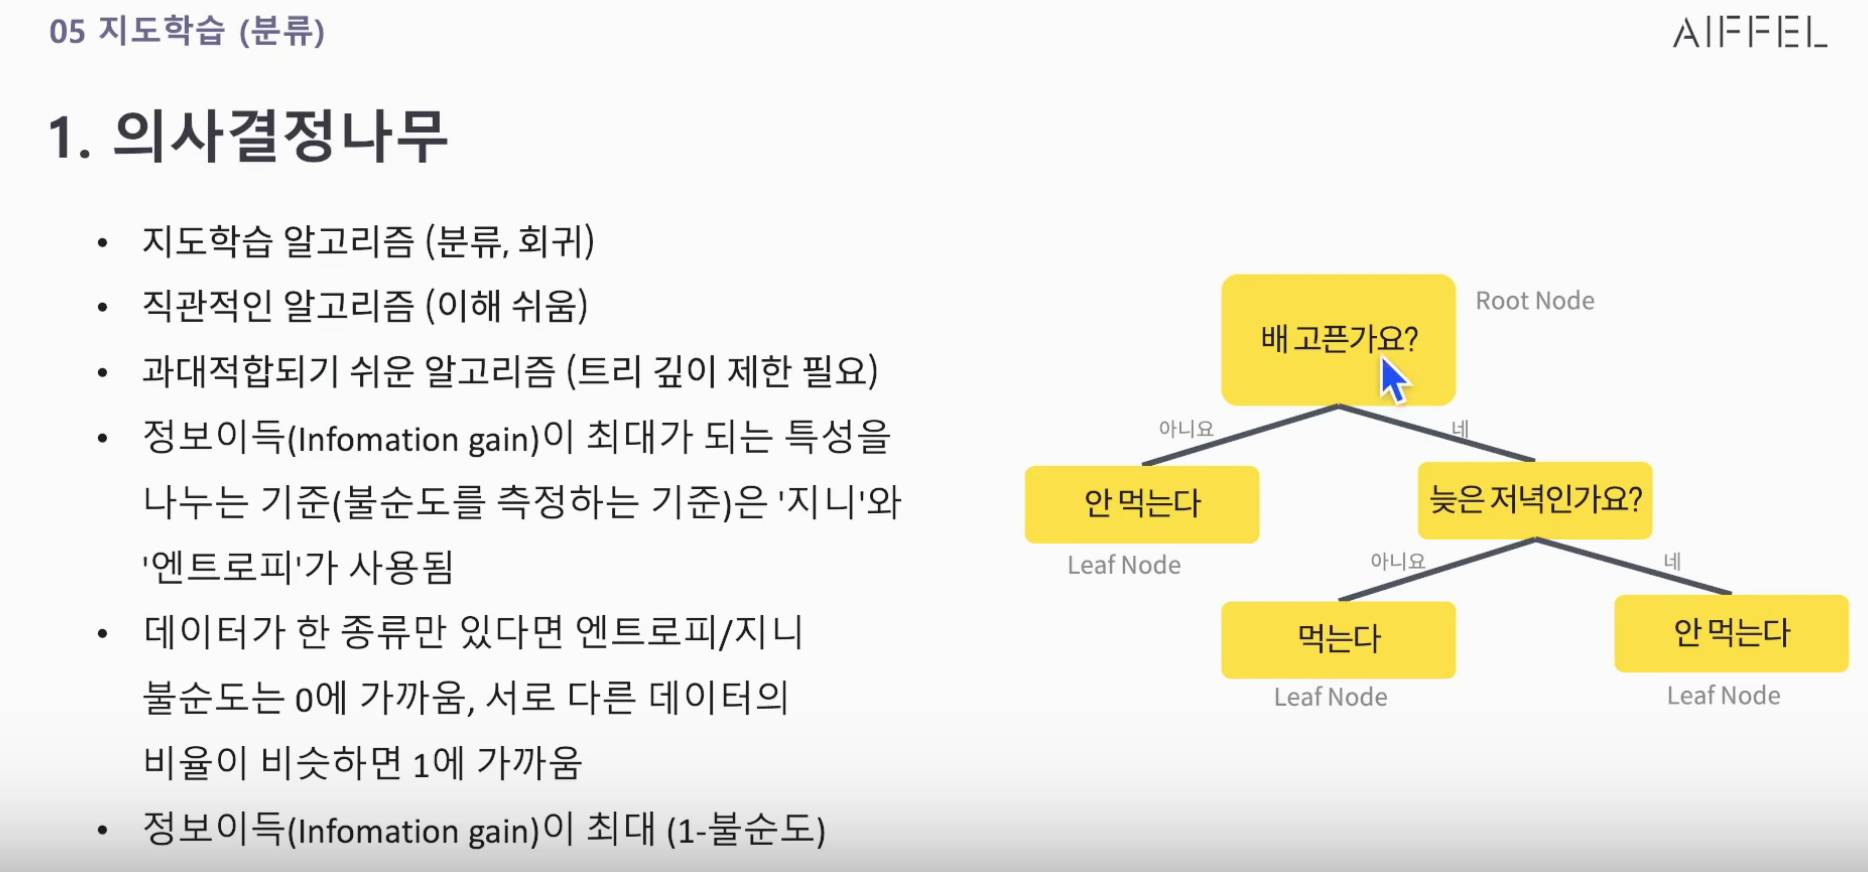

엔트로피 - 주어진 데이터 집합의 혼잡도, 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값.
지니 계수 - 지니 계수가 낮을 수록 데이터의 균일도가 높은 것으로 해석, 지나 계수가 낮은 속성을 기준으로 분할.

* DecisionTreeClassifier - 기본적으로 지니 계수를 이용하여 데이터 세트를 분할. 결정트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건 (정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 모든 데이터가 특정 분류에 속하면 분할을 멈추고 분류를 결정))

* min_samples_split
* min_samples_leaf
* max_features
* max_depth
* max_leaf_nodes

시각화 - Graphviz

In [ ]:
#Decision Tree 의 시각화

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot의 파일을 생성함

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

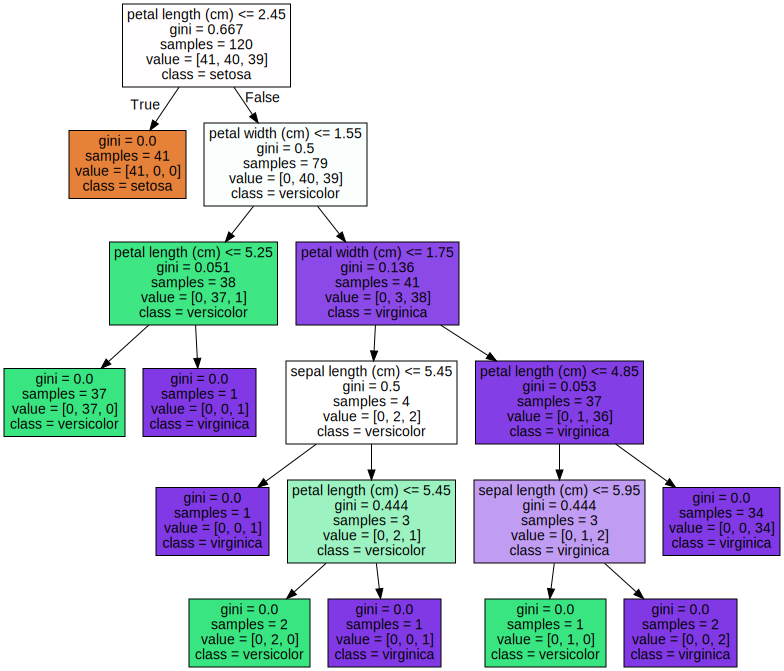

In [ ]:
import graphviz
#위에서 생성한 tree.dot파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결정 트리의 경우, 생성 로직을 미리 정하지 않으면 완벽하게 클래스 값을 구별하기 위해 계속해서 트리 노드를 만듬 (복잡하고 과적합)
> 결정 트리 알고리즘을 제어하는 하이퍼 파라미터로 복잡한 트리의 생성을 막음

Feacture importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

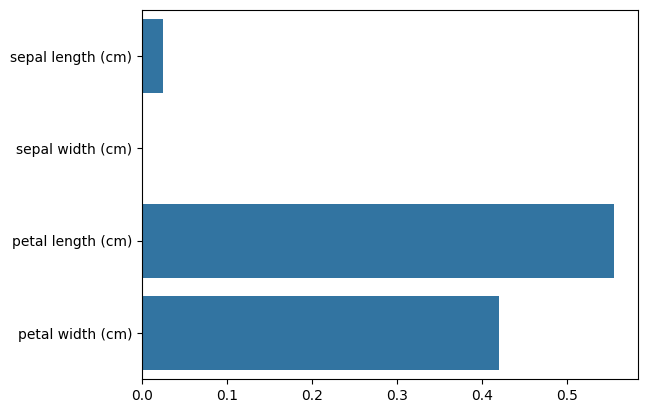

In [ ]:
# 피치별로 결정 트리 알고리즘에서 중요도를 추출하는 단계를 거치기

import seaborn as sns
import numpy as np
%matplotlib inline

#feacture importance 추출
print("Feacture importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance를 매핑해서 출력
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#iris_data.feature_names는 특성 이름들(예: 꽃잎 길이, 너비 등)을 담고 있습니다.
#zip()을 이용해 각 특성 이름과 중요도를 짝지어 출력합니다.
#예: petal length (cm): 0.682

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정 트리 과적합 (overfitting)

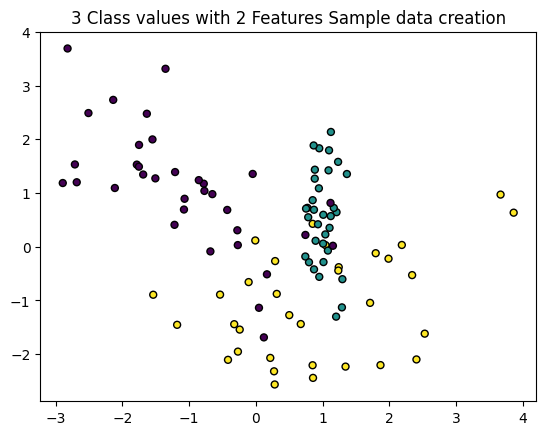

In [ ]:
from re import X
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plt.scatter(
#     X_features[:, 0],     # x좌표: 첫 번째 특성 값
#     X_features[:, 1],     # y좌표: 두 번째 특성 값
#     marker='o',           # 점 모양: 동그라미
#     c=y_labels,           # 색깔: y값(클래스 레이블)에 따라 자동 지정
#     s=25,                 # 점 크기
#     edgecolors='k'        # 테두리 색: 검정



#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')


이 그래프에서의 x, y 좌표는 '위치 정보'가 아니라,
단지 선택한 두 개의 특성값 (예: 꽃잎 길이와 너비)을 기반으로
그 값의 조합이 어떤 패턴이나 군집(클러스터)을 가지는지 시각적으로 보기 위함이에요.

만약 특성이 4개면? → X_features[:, 0]과 [:, 1]은 그중 두 개만 본 것일 뿐입니다.
전체 데이터의 구조를 완전히 보여주는 건 아니에요.

예: 붓꽃(iris) 데이터에서
sepal length	sepal width	petal length	petal width	label
5.1	3.5	1.4	0.2	setosa (0)

python
Copy
Edit
X_features = iris.data[:, [2, 3]]  # petal length, petal width
y_labels = iris.target             # 0, 1, 2 → 품종
이 경우, plt.scatter는:

x = petal length, y = petal width를 x-y 평면에 찍고,

색상 = 품종에 따라 다르게 표시한 겁니다.

그래서 실제 위치(지도상의 좌표)와는 아무런 상관이 없고,
**“변수 간 관계를 시각적으로 확인하려고 투영한 것”**이에요.

>>>>>

x축: 꽃잎 길이

y축: 꽃잎 너비

색깔: 품종



In [ ]:
from sklearn.tree import DecisionTreeClassifier


import numpy as np
import matplotlib.pyplot as plt

def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이터 산점도 그리기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 모델 학습
    model.fit(X, y)

    # 결정 경계 시각화를 위한 그리드 생성
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 결정 경계 그리기
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


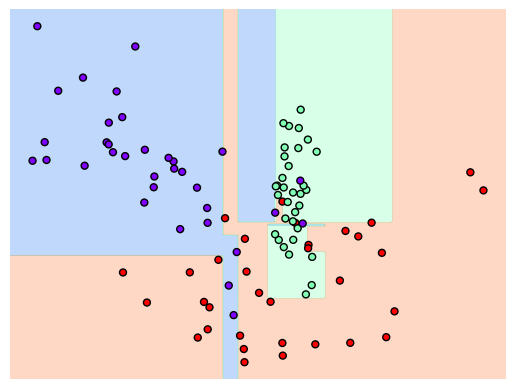

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

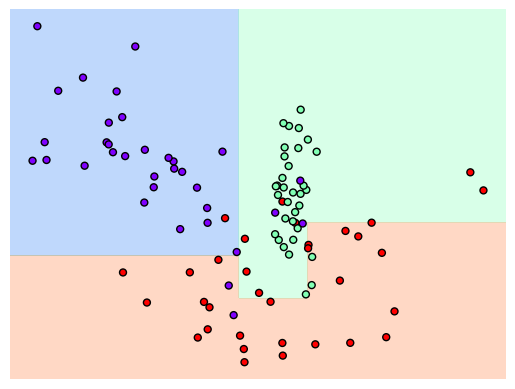

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 공백으로 분리되어 있는 데이터를 data frame에 column 으로 분류하기
#학습용 데이터와 테스트용 데이터를 분류하기


In [ ]:
# 공백으로 분리되어 있는 데이터를 data frame에 sep으로 할당하기

import pandas as pd

def get_human_database():
    feacture_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    #중복된 피쳐명을 수정하는 get_new_feacture_name_df()를 이용, 신규 피처명 dataframe을 생성
    new_feacture_name_df = get_new_feacture_name_df(feacture_name_df)
    #dataframe에 피쳐명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feacture_name = feacture_name_df.iloc[:, 1].values.tolist()

    #학습 피쳐 데이터 세트와 테스트 피쳐 데이터를 dataframe으로 로딩, 칼럼명은 feacture_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feacture_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feacture_name)

    #학습 레이블과 테스트 레이블 데이터를 dataframe으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    #로드된 학습/테스트용 dataframe을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_database()